In [ ]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx

class GraphEditor:
    def __init__(self, master):
        self.master = master
        self.canvas = tk.Canvas(master, width=300, height=300)
        self.canvas.pack()
        self.graph = nx.Graph()
        self.vertex_list_entry = tk.Entry(master)
        self.vertex_list_entry.pack()
        self.edge_list_entry = tk.Entry(master)
        self.edge_list_entry.pack()
        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.pack()
        self.selected_edge = None

        self.master.bind("<Key>", self.key_pressed)

        self.finalize_button = tk.Button(master, text="Finalize Graph", command=self.finalize_graph)
        self.finalize_button.pack()

    def draw_graph(self):
        vertex_list = self.vertex_list_entry.get().split()
        edge_list = self.edge_list_entry.get().split()

        for vertex in vertex_list:
            self.graph.add_node(vertex)

        for edge in edge_list:
            u, v = edge.split('-')
            if u in self.graph.nodes() and v in self.graph.nodes():
                self.graph.add_edge(u, v)

        self.draw_graph_on_canvas()

    def draw_graph_on_canvas(self):
        self.canvas.delete("all")
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, ax=self.canvas)

    def key_pressed(self, event):
        pass  # No key press functionality for now

    def finalize_graph(self):
        self.canvas.unbind("<Key>")
        self.finalize_button.config(state=tk.DISABLED)

def main():
    root = tk.Tk()
    root.title("Graph Editor")
    editor = GraphEditor(root)
    root.mainloop()

if __name__ == "__main__":
    main()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-5-826ca7cb6d1c>", line 36, in draw_graph
    self.draw_graph_on_canvas()
  File "<ipython-input-5-826ca7cb6d1c>", line 41, in draw_graph_on_canvas
    nx.draw(self.graph, pos, ax=self.canvas)
  File "C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py", line 112, in draw
    cf = ax.get_figure()
AttributeError: 'Canvas' object has no attribute 'get_figure'


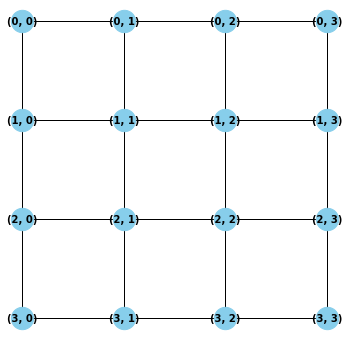

In [1]:
import tkinter as tk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


def create_grid_graph():
    G = nx.grid_2d_graph(4, 4)
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    return G, pos


def draw_graph():
    G, pos = create_grid_graph()
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
    return fig


def main():
    root = tk.Tk()
    root.title("Grid Graph Visualization")

    fig = draw_graph()
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    root.mainloop()


if __name__ == "__main__":
    main()


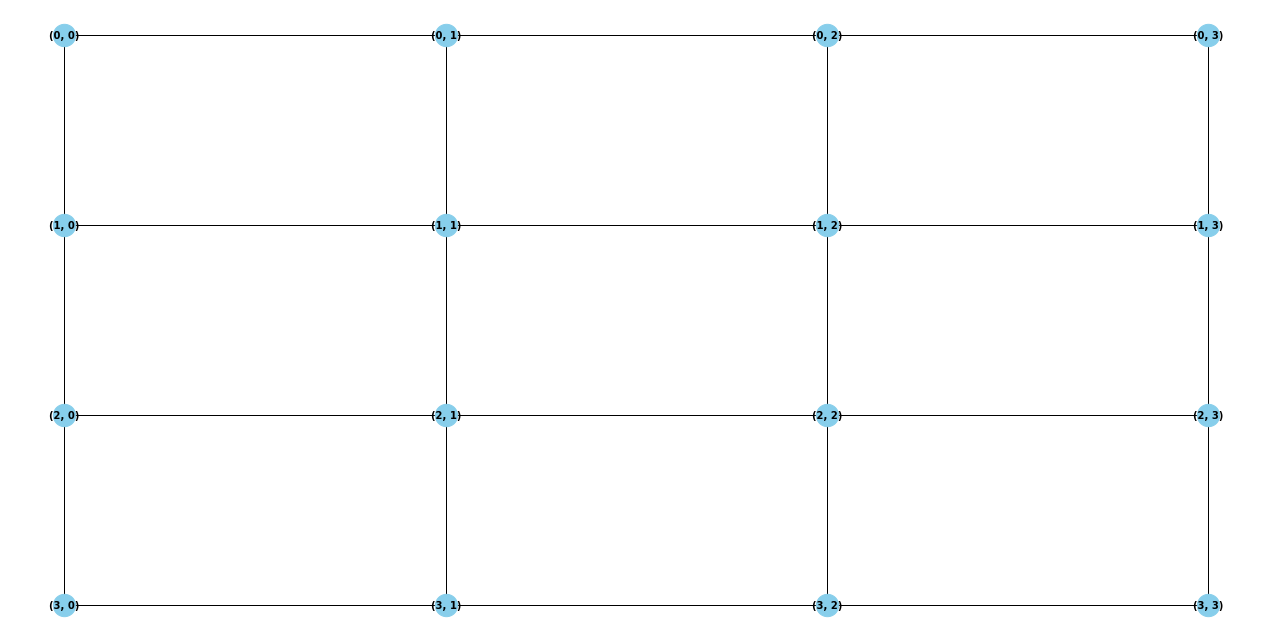

In [2]:
import tkinter as tk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.G, self.pos = self.create_grid_graph()
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.selected_block = None
        self.root.bind("<Key>", self.key_press_event)

    def create_grid_graph(self):
        G = nx.grid_2d_graph(4, 4)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}
        return G, pos

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        row_start = (block_num - 1) // 3 * 4
        col_start = (block_num - 1) % 3 * 4
        edges_to_highlight = [(i, j) for i in range(row_start, row_start + 4) for j in range(col_start, col_start + 4)]
        for edge in self.G.edges():
            if edge[0] in edges_to_highlight or edge[1] in edges_to_highlight:
                self.G.edges[edge]['color'] = 'green'
            else:
                self.G.edges[edge]['color'] = 'black'

    def key_press_event(self, event):
        key = event.char
        if key.isdigit() and 1 <= int(key) <= 9:
            block_num = int(key)
            self.highlight_block_edges(block_num)
            self.draw_graph()
            self.canvas.draw()


def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()


if __name__ == "__main__":
    main()


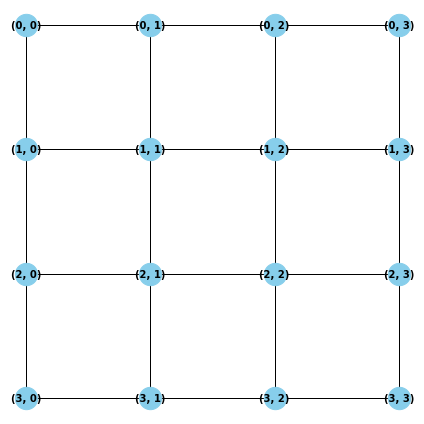

In [7]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.G, self.pos = self.create_grid_graph()
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def create_grid_graph(self):
        G = nx.grid_2d_graph(4, 4)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}
        return G, pos

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        row_start = (block_num - 1) // 3 * 4
        col_start = (block_num - 1) % 3 * 4
        edges_to_highlight = [(i, j) for i in range(row_start, row_start + 4) for j in range(col_start, col_start + 4)]
        for edge in self.G.edges():
            if edge[0] in edges_to_highlight and edge[1] in edges_to_highlight:
                self.G.edges[edge]['color'] = 'green'
            else:
                self.G.edges[edge]['color'] = 'black'
        self.draw_graph()
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)


def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()


if __name__ == "__main__":
    main()


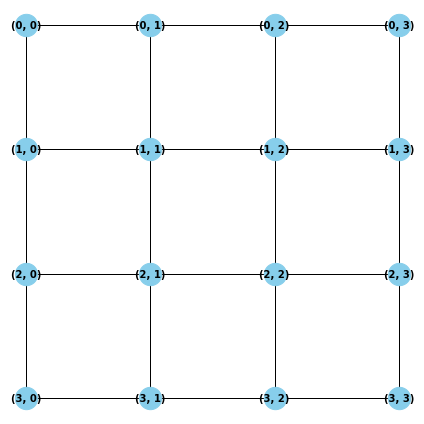

In [15]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.G, self.pos = self.create_grid_graph()
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def create_grid_graph(self):
        G = nx.grid_2d_graph(4, 4)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}
        return G, pos

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        block_vertices = {
            1: [1, 2, 5, 6],
            2: [2, 3, 6, 7],
            3: [3, 4, 7, 8],
            4: [5, 6, 9, 10],
            5: [6, 7, 10, 11],
            6: [7, 8, 11, 12],
            7: [9, 10, 13, 14],
            8: [10, 11, 14, 15],
            9: [11, 12, 15, 16]
        }
        vertices = block_vertices[block_num]
        edges_to_highlight = [(vertices[i], vertices[(i + 1) % 4]) for i in range(4)]
        for edge in self.G.edges():
            if edge in edges_to_highlight or (edge[1], edge[0]) in edges_to_highlight:
                self.G.edges[edge]['color'] = 'green'
            else:
                self.G.edges[edge]['color'] = 'black'
        self.draw_graph()
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)


def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()


if __name__ == "__main__":
    main()


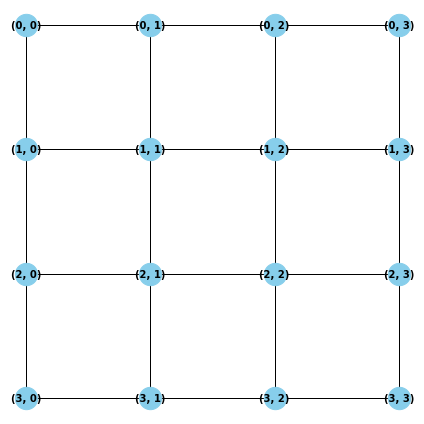

In [16]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.G, self.pos = self.create_grid_graph()
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def create_grid_graph(self):
        G = nx.grid_2d_graph(4, 4)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}
        return G, pos

    def draw_graph(self):
        self.ax.clear()
        colors = ['green' if 'color' in self.G.edges[edge] and self.G.edges[edge]['color'] == 'green' else 'black' for edge in self.G.edges()]
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=colors)
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        block_vertices = {
            1: [1, 2, 5, 6],
            2: [2, 3, 6, 7],
            3: [3, 4, 7, 8],
            4: [5, 6, 9, 10],
            5: [6, 7, 10, 11],
            6: [7, 8, 11, 12],
            7: [9, 10, 13, 14],
            8: [10, 11, 14, 15],
            9: [11, 12, 15, 16]
        }
        vertices = block_vertices[block_num]
        edges_to_highlight = [(vertices[i], vertices[(i + 1) % 4]) for i in range(4)]
        for edge in self.G.edges():
            if edge in edges_to_highlight or (edge[1], edge[0]) in edges_to_highlight:
                self.G.edges[edge]['color'] = 'green'
            else:
                self.G.edges[edge]['color'] = 'black'
        self.draw_graph()
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)


def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()


if __name__ == "__main__":
    main()


Block number: 9
Block vertices: [11, 12, 15, 16]
Edges to highlight: [(11, 12), (12, 15), (15, 16), (16, 11)]


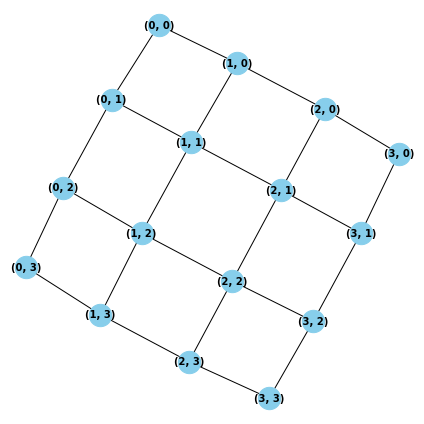

In [6]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.G, self.pos, self.edge_list, self.vertex_list = self.create_grid_graph()
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def create_grid_graph(self):
        G = nx.grid_2d_graph(4, 4)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}
        edge_list = list(G.edges())
        vertex_list = list(G.nodes())
        return G, pos, edge_list, vertex_list

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [1, 2, 5, 6],
            2: [2, 3, 6, 7],
            3: [3, 4, 7, 8],
            4: [5, 6, 9, 10],
            5: [6, 7, 10, 11],
            6: [7, 8, 11, 12],
            7: [9, 10, 13, 14],
            8: [10, 11, 14, 15],
            9: [11, 12, 15, 16]
        }
        vertices = block_vertices[block_num]
        print("Block vertices:", vertices)
        block_edge_list = [(vertices[i], vertices[(i + 1) % 4]) for i in range(4)]
        print("Edges to highlight:", block_edge_list)

        self.ax.clear()  # Clear the plot
        for i in self.edge_list:
            if i in block_edge_list:
                self.G.add_edge(i[0],i[1],color='green')
            else:
                self.G.add_edge(i[0],i[1],color='black')
        nx.draw(self.G, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
        plt.tight_layout()
        self.canvas.draw()  # Update canvas

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)


def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()


if __name__ == "__main__":
    main()


Block number: 9
Block vertices: [11, 12, 15, 16]
Edges to highlight: [(11, 12), (12, 15), (15, 16), (16, 11)]


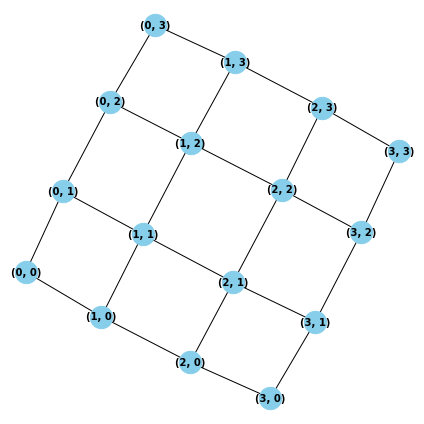

In [9]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.G, self.pos, self.edge_list, self.vertex_list = self.create_grid_graph()
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def create_grid_graph(self):
        G = nx.grid_2d_graph(4, 4)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}
        edge_list = list(G.edges())
        vertex_list = list(G.nodes())
        return G, pos, edge_list, vertex_list

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
        1: [1, 2, 5, 6],
        2: [2, 3, 6, 7],
        3: [3, 4, 7, 8],
        4: [5, 6, 9, 10],
        5: [6, 7, 10, 11],
        6: [7, 8, 11, 12],
        7: [9, 10, 13, 14],
        8: [10, 11, 14, 15],
        9: [11, 12, 15, 16]
        }
        vertices = block_vertices[block_num]
        print("Block vertices:", vertices)
        block_edge_list = [(vertices[i], vertices[(i + 1) % 4]) for i in range(4)]
        print("Edges to highlight:", block_edge_list)

    # Clear the plot and remove all edges
        self.ax.clear()
        self.canvas.get_tk_widget().delete("all")
        self.G = nx.Graph()
        self.G.add_nodes_from(self.vertex_list)

    # Add edges with colors
        for edge in self.edge_list:
            if edge in block_edge_list:
                self.G.add_edge(edge[0], edge[1], color='green')
            else:
                self.G.add_edge(edge[0], edge[1], color='black')

    # Draw the updated graph
        nx.draw(self.G, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=[self.G[u][v]['color'] for u, v in self.G.edges()])
        plt.tight_layout()
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)


def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()


if __name__ == "__main__":
    main()


Block number: 9
Edges to highlight: [((2, 2), (2, 3)), ((2, 3), (3, 3)), ((3, 2), (3, 3)), ((2, 2), (3, 2))]
Block number: 5
Edges to highlight: [((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 1), (2, 2)), ((1, 1), (2, 1))]


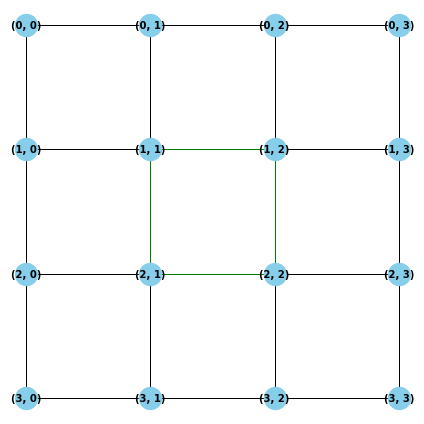

In [6]:
import tkinter as tk
from tkinter import simpledialog
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        # Create a 4x4 grid graph
        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        
        # Initialize canvas and draw graph
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        # Create canvas widget
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        # Button to select block
        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        # Configure grid weights
        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i]=block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        # Update edge colors
        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        # Clear the plot and draw updated graph with edge colors
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        plt.tight_layout()

        # Update canvas
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)

def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()


Block number: 5
Edges to highlight: [((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 1), (2, 2)), ((1, 1), (2, 1))]
Block number: 3
Edges to highlight: [((2, 0), (2, 1)), ((2, 1), (3, 1)), ((3, 0), (3, 1)), ((2, 0), (3, 0))]


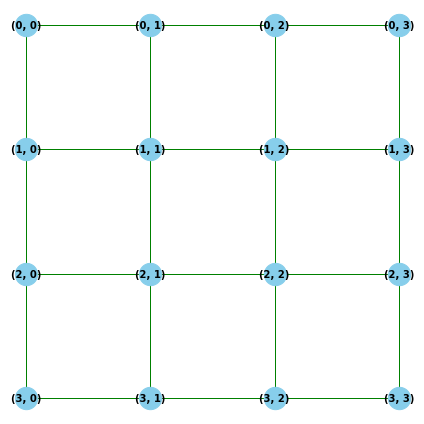

In [10]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        # Create a 4x4 grid graph
        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        self.selected_block = None
        self.selected_edge = None  # To store currently selected edge
        
        # Initialize canvas and draw graph
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        # Create canvas widget
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        # Button to select block
        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        # Bind keyboard events
        root.bind("<KeyPress>", self.on_key_press)
        root.bind("<KeyRelease>", self.on_key_release)

        # Configure grid weights
        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i] = block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        # Update edge colors
        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        # Clear the plot and draw updated graph with edge colors
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        plt.tight_layout()

        # Update canvas
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)
            self.selected_block = block_num

    def on_key_press(self, event):
        if self.selected_block:
            if event.char.lower() in ['w', 'a', 's', 'd']:
                self.selected_edge = event.char.lower()
                self.highlight_selected_edge()
            elif event.char.lower() == ' ':
                self.assign_weight()
    
    def highlight_selected_edge(self):
        if self.selected_block and self.selected_edge:
            block_vertices = {
                1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                9: [(2, 2), (2, 3), (3, 3), (3, 2)]
            }
            block_edge = None
            if self.selected_edge == 'w':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
            elif self.selected_edge == 'a':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
            elif self.selected_edge == 's':
                block_edge = (block_vertices[self.selected_block][2], block_vertices[self.selected_block][3])
            elif self.selected_edge == 'd':
                block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
            
            if block_edge:
                edge_colors = ['red' if edge == block_edge else 'green' for edge in self.G.edges()]
                self.ax.clear()
                nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
                plt.tight_layout()
                self.canvas.draw()

    def assign_weight(self):
        if self.selected_block and self.selected_edge:
            if self.selected_edge:
                weight = simpledialog.askfloat("Assign Weight", "Enter the weight for the edge:", parent=self.root)
                if weight is not None:
                    block_vertices = {
                        1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                        2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                        3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                        4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                        5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                        6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                        7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                        8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                        9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                    }
                    block_edge = None
                    if self.selected_edge == 'w':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                    elif self.selected_edge == 'a':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 's':
                        block_edge = (block_vertices[self.selected_block][2], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 'd':
                        block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                    
                    if block_edge:
                        self.G.edges[block_edge]['weight'] = weight
                        self.highlight_selected_edge()

    def on_key_release(self, event):
        if event.char.lower() == 'r':
            self.selected_edge = None
            self.highlight_selected_edge()
        elif event.keysym == 'Delete':
            if self.selected_block and self.selected_edge:
                block_vertices = {
                    1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                    2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                    3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                    4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                    5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                    6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                    7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                    8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                    9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                }
                block_edge = None
                if self.selected_edge == 'w':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                elif self.selected_edge == 'a':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                elif self.selected_edge == 's':
                    block_edge = (block_vertices[self.selected_block][2], block_vertices[self.selected_block][3])
                elif self.selected_edge == 'd':
                    block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                
                if block_edge:
                    self.G.remove_edge(*block_edge)
                    self.selected_edge = None
                    self.draw_graph()
        
def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()


Block number: 5
Edges to highlight: [((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 1), (2, 2)), ((1, 1), (2, 1))]
Block number: 5
Edges to highlight: [((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 1), (2, 2)), ((1, 1), (2, 1))]


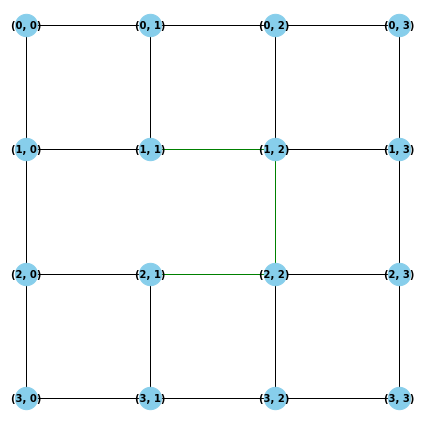

In [4]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        # Create a 4x4 grid graph
        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        self.selected_block = None
        self.selected_edge = None  # To store currently selected edge
        
        # Initialize canvas and draw graph
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        # Create canvas widget
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        # Button to select block
        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        # Bind keyboard events
        root.bind("<KeyPress>", self.on_key_press)
        root.bind("<KeyRelease>", self.on_key_release)

        # Configure grid weights
        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i] = block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        # Update edge colors
        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        # Clear the plot and draw updated graph with edge colors
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        plt.tight_layout()

        # Update canvas
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)
            self.selected_block = block_num

    def on_key_press(self, event):
        if self.selected_block:
            if event.char.lower() in ['w', 'a', 's', 'd']:
                self.selected_edge = event.char.lower()
                self.highlight_selected_edge()
            elif event.char.lower() == ' ':
                self.assign_weight()
    
    def highlight_selected_edge(self):
        if self.selected_block and self.selected_edge:
            block_vertices = {
                1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                9: [(2, 2), (2, 3), (3, 3), (3, 2)]
            }
            block_edge = None
            if self.selected_edge == 'w':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
            elif self.selected_edge == 'a':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
            elif self.selected_edge == 's':
                block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
            elif self.selected_edge == 'd':
                block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
            
            if block_edge:
                edge_colors = ['red' if edge == block_edge else 'green' for edge in self.G.edges()]
                self.ax.clear()
                nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
                plt.tight_layout()
                self.canvas.draw()

    def assign_weight(self):
        if self.selected_block and self.selected_edge:
            if self.selected_edge:
                weight = simpledialog.askfloat("Assign Weight", "Enter the weight for the edge:", parent=self.root)
                if weight is not None:
                    block_vertices = {
                        1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                        2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                        3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                        4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                        5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                        6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                        7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                        8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                        9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                    }
                    block_edge = None
                    if self.selected_edge == 'w':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                    elif self.selected_edge == 'a':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 's':
                        block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                    elif self.selected_edge == 'd':
                        block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                    
                    if block_edge:
                        self.G.edges[block_edge]['weight'] = weight
                        self.highlight_selected_edge()

    def on_key_release(self, event):
        if event.char.lower() == 'r':
            self.selected_edge = None
            self.highlight_selected_edge()  # Redraw with released edge
            messagebox.showinfo("Edge Released", "The edge has been released.")
        elif event.keysym == 'Delete':
            if self.selected_block and self.selected_edge:
                block_vertices = {
                    1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                    2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                    3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                    4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                    5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                    6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                    7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                    8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                    9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                }
                block_edge = None
                if self.selected_edge == 'w':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                elif self.selected_edge == 'a':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                elif self.selected_edge == 's':
                    block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                elif self.selected_edge == 'd':
                    block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                
                if block_edge:
                    self.G.remove_edge(*block_edge)
                    self.selected_edge = None
                    self.draw_graph()  # Redraw graph

def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()


Block number: 5
Edges to highlight: [((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 1), (2, 2)), ((1, 1), (2, 1))]
Block number: 4
Edges to highlight: [((0, 1), (0, 2)), ((0, 2), (1, 2)), ((1, 1), (1, 2)), ((0, 1), (1, 1))]
Block number: 1
Edges to highlight: [((0, 0), (0, 1)), ((0, 1), (1, 1)), ((1, 0), (1, 1)), ((0, 0), (1, 0))]


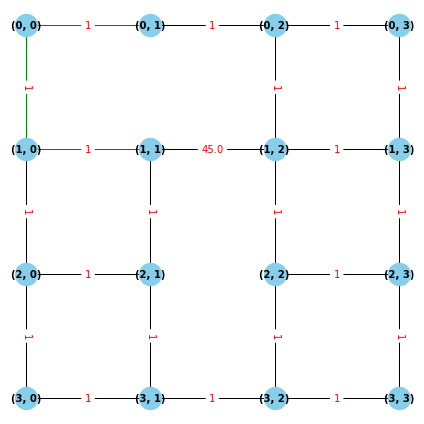

In [7]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        # Create a 4x4 grid graph
        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        self.selected_block = None
        self.selected_edge = None  # To store currently selected edge
        
        # Initialize canvas and draw graph
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        # Create canvas widget
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        # Button to select block
        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        # Bind keyboard events
        root.bind("<KeyPress>", self.on_key_press)
        root.bind("<KeyRelease>", self.on_key_release)

        # Configure grid weights
        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        
        # Draw edge weights
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i] = block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        # Update edge colors
        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        # Clear the plot and draw updated graph with edge colors
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        
        # Draw edge weights
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

        # Update canvas
        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)
            self.selected_block = block_num

    def on_key_press(self, event):
        if self.selected_block:
            if event.char.lower() in ['w', 'a', 's', 'd']:
                self.selected_edge = event.char.lower()
                self.highlight_selected_edge()
            elif event.char.lower() == ' ':
                self.assign_weight()
    
    def highlight_selected_edge(self):
        if self.selected_block and self.selected_edge:
            block_vertices = {
                1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                9: [(2, 2), (2, 3), (3, 3), (3, 2)]
            }
            block_edge = None
            if self.selected_edge == 'w':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
            elif self.selected_edge == 'a':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
            elif self.selected_edge == 's':
                block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
            elif self.selected_edge == 'd':
                block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
            
            if block_edge:
                edge_colors = ['red' if edge == block_edge else 'green' for edge in self.G.edges()]
                self.ax.clear()
                nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
                
                # Draw edge weights
                edge_labels = {}
                for u, v, d in self.G.edges(data=True):
                    weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
                    edge_labels[(u, v)] = weight
                nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
                
                plt.tight_layout()
                self.canvas.draw()

    def assign_weight(self):
        if self.selected_block and self.selected_edge:
            if self.selected_edge:
                weight = simpledialog.askfloat("Assign Weight", "Enter the weight for the edge:", parent=self.root)
                if weight is not None:
                    block_vertices = {
                        1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                        2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                        3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                        4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                        5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                        6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                        7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                        8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                        9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                    }
                    block_edge = None
                    if self.selected_edge == 'w':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                    elif self.selected_edge == 'a':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 's':
                        block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                    elif self.selected_edge == 'd':
                        block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                    
                    if block_edge:
                        self.G.edges[block_edge]['weight'] = weight
                        self.highlight_selected_edge()

    def on_key_release(self, event):
        if event.keysym == 'Delete':
            if self.selected_block and self.selected_edge:
                block_vertices = {
                    1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                    2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                    3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                    4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                    5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                    6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                    7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                    8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                    9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                }
                block_edge = None
                if self.selected_edge == 'w':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                elif self.selected_edge == 'a':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                elif self.selected_edge == 's':
                    block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                elif self.selected_edge == 'd':
                    block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                
                if block_edge:
                    self.G.remove_edge(*block_edge)
                    self.selected_edge = None
                    self.draw_graph()  # Redraw graph

def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()


[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)] ['right,right', 'right,right', 'right,right', 'right', 'right', 'right']


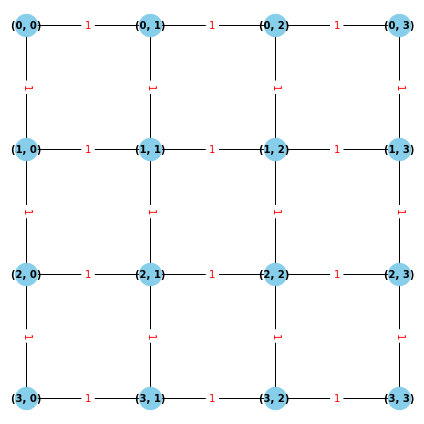

In [5]:
import tkinter as tk
from tkinter import simpledialog, messagebox, ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import heapq
direction,turnings="up",[]
class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        self.selected_block = None
        self.selected_edge = None  # To store currently selected edge
        
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        self.finalize_button = tk.Button(root, text="Finalize Graph", command=self.finalize_graph)
        self.finalize_button.grid(row=2, column=0, columnspan=2, pady=10)

        root.bind("<KeyPress>", self.on_key_press)
        root.bind("<KeyRelease>", self.on_key_release)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i] = block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)
            self.selected_block = block_num

    def on_key_press(self, event):
        if self.selected_block:
            if event.char.lower() in ['w', 'a', 's', 'd']:
                self.selected_edge = event.char.lower()
                self.highlight_selected_edge()
            elif event.char.lower() == ' ':
                self.assign_weight()
    
    def highlight_selected_edge(self):
        if self.selected_block and self.selected_edge:
            block_vertices = {
                1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                9: [(2, 2), (2, 3), (3, 3), (3, 2)]
            }
            block_edge = None
            if self.selected_edge == 'w':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
            elif self.selected_edge == 'a':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
            elif self.selected_edge == 's':
                block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
            elif self.selected_edge == 'd':
                block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
            
            if block_edge:
                edge_colors = ['red' if edge == block_edge else 'green' for edge in self.G.edges()]
                self.ax.clear()
                nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
                
                edge_labels = {}
                for u, v, d in self.G.edges(data=True):
                    weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
                    edge_labels[(u, v)] = weight
                nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
                
                plt.tight_layout()
                self.canvas.draw()

    def assign_weight(self):
        if self.selected_block and self.selected_edge:
            if self.selected_edge:
                weight = simpledialog.askfloat("Assign Weight", "Enter the weight for the edge:", parent=self.root)
                if weight is not None:
                    block_vertices = {
                        1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                        2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                        3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                        4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                        5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                        6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                        7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                        8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                        9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                    }
                    block_edge = None
                    if self.selected_edge == 'w':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                    elif self.selected_edge == 'a':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 's':
                        block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                    elif self.selected_edge == 'd':
                        block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                    
                    if block_edge:
                        self.G.edges[block_edge]['weight'] = weight
                        self.highlight_selected_edge()

    def on_key_release(self, event):
        if event.keysym == 'Delete':
            if self.selected_block and self.selected_edge:
                block_vertices = {
                    1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                    2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                    3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                    4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                    5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                    6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                    7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                    8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                    9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                }
                block_edge = None
                if self.selected_edge == 'w':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                elif self.selected_edge == 'a':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                elif self.selected_edge == 's':
                    block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                elif self.selected_edge == 'd':
                    block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                
                if block_edge:
                    self.G.remove_edge(*block_edge)
                    self.selected_edge = None
                    self.draw_graph()  # Redraw graph

    def finalize_graph(self):
        self.side_pane = tk.Toplevel(self.root)
        self.side_pane.title("Finalize Graph")
        
        tk.Label(self.side_pane, text="Initial Node:").grid(row=0, column=0, padx=5, pady=5, sticky="e")
        self.initial_node_entry = tk.Entry(self.side_pane)
        self.initial_node_entry.grid(row=0, column=1, padx=5, pady=5)

        tk.Label(self.side_pane, text="Destination Node:").grid(row=1, column=0, padx=5, pady=5, sticky="e")
        self.destination_node_entry = tk.Entry(self.side_pane)
        self.destination_node_entry.grid(row=1, column=1, padx=5, pady=5)

        tk.Button(self.side_pane, text="Find Shortest Path", command=self.find_shortest_path).grid(row=2, column=0, columnspan=2, padx=5, pady=10)

    def find_shortest_path(self):
        initial_node = self.initial_node_entry.get()
        destination_node = self.destination_node_entry.get()
        
        try:
            initial_node = tuple(map(int, initial_node.split(',')))
            destination_node = tuple(map(int, destination_node.split(',')))

            if initial_node in self.G.nodes() and destination_node in self.G.nodes():
                shortest_path = nx.dijkstra_path(self.G, initial_node, destination_node)
                shortest_path_length = nx.dijkstra_path_length(self.G, initial_node, destination_node)
                
                l =[]
                for i in range(len(shortest_path)-1):
                    if shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]<shortest_path[i+1][1]:
                        # turn right
                        l.append("right")
                    if shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]>shortest_path[i+1][1]:
                        # turn left
                        l.append("left")
                    if shortest_path[i][0]<shortest_path[i+1][0] and shortest_path[i][1]==shortest_path[i+1][1]:
                        # turn right, turn right
                        l.append("right,right")
                print(shortest_path, l)
                        
                messagebox.showinfo("Shortest Path", f"The shortest path from {initial_node} to {destination_node} is: {shortest_path}\nLength: {shortest_path_length}")
            else:
                messagebox.showerror("Error", "Invalid node coordinates. Please enter valid node coordinates.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()


[(1, 0), (2, 0), (3, 0), (3, 1), (3, 2)] [4, 4, 2, 3, 2]


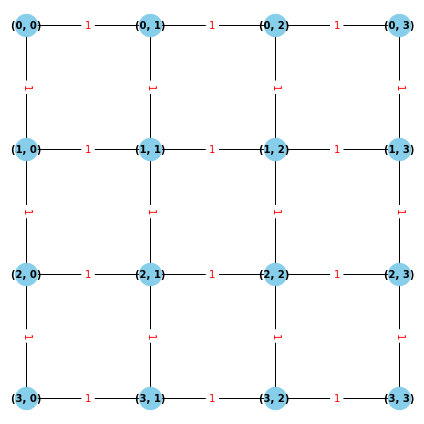

In [3]:
import tkinter as tk
from tkinter import simpledialog, messagebox, ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import heapq
direction,turnings="up",[]
class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        self.selected_block = None
        self.selected_edge = None  # To store currently selected edge
        
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        self.finalize_button = tk.Button(root, text="Finalize Graph", command=self.finalize_graph)
        self.finalize_button.grid(row=2, column=0, columnspan=2, pady=10)

        root.bind("<KeyPress>", self.on_key_press)
        root.bind("<KeyRelease>", self.on_key_release)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i] = block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)
            self.selected_block = block_num

    def on_key_press(self, event):
        if self.selected_block:
            if event.char.lower() in ['w', 'a', 's', 'd']:
                self.selected_edge = event.char.lower()
                self.highlight_selected_edge()
            elif event.char.lower() == ' ':
                self.assign_weight()
    
    def highlight_selected_edge(self):
        if self.selected_block and self.selected_edge:
            block_vertices = {
                1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                9: [(2, 2), (2, 3), (3, 3), (3, 2)]
            }
            block_edge = None
            if self.selected_edge == 'w':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
            elif self.selected_edge == 'a':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
            elif self.selected_edge == 's':
                block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
            elif self.selected_edge == 'd':
                block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
            
            if block_edge:
                edge_colors = ['red' if edge == block_edge else 'green' for edge in self.G.edges()]
                self.ax.clear()
                nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
                
                edge_labels = {}
                for u, v, d in self.G.edges(data=True):
                    weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
                    edge_labels[(u, v)] = weight
                nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
                
                plt.tight_layout()
                self.canvas.draw()

    def assign_weight(self):
        if self.selected_block and self.selected_edge:
            if self.selected_edge:
                weight = simpledialog.askfloat("Assign Weight", "Enter the weight for the edge:", parent=self.root)
                if weight is not None:
                    block_vertices = {
                        1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                        2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                        3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                        4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                        5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                        6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                        7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                        8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                        9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                    }
                    block_edge = None
                    if self.selected_edge == 'w':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                    elif self.selected_edge == 'a':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 's':
                        block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                    elif self.selected_edge == 'd':
                        block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                    
                    if block_edge:
                        self.G.edges[block_edge]['weight'] = weight
                        self.highlight_selected_edge()

    def on_key_release(self, event):
        if event.keysym == 'Delete':
            if self.selected_block and self.selected_edge:
                block_vertices = {
                    1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                    2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                    3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                    4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                    5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                    6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                    7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                    8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                    9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                }
                block_edge = None
                if self.selected_edge == 'w':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                elif self.selected_edge == 'a':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                elif self.selected_edge == 's':
                    block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                elif self.selected_edge == 'd':
                    block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                
                if block_edge:
                    self.G.remove_edge(*block_edge)
                    self.selected_edge = None
                    self.draw_graph()  # Redraw graph

    def finalize_graph(self):
        self.side_pane = tk.Toplevel(self.root)
        self.side_pane.title("Finalize Graph")
        
        tk.Label(self.side_pane, text="Initial Node:").grid(row=0, column=0, padx=5, pady=5, sticky="e")
        self.initial_node_entry = tk.Entry(self.side_pane)
        self.initial_node_entry.grid(row=0, column=1, padx=5, pady=5)

        tk.Label(self.side_pane, text="Destination Node:").grid(row=1, column=0, padx=5, pady=5, sticky="e")
        self.destination_node_entry = tk.Entry(self.side_pane)
        self.destination_node_entry.grid(row=1, column=1, padx=5, pady=5)

        tk.Button(self.side_pane, text="Find Shortest Path", command=self.find_shortest_path).grid(row=2, column=0, columnspan=2, padx=5, pady=10)

    def find_shortest_path(self):
        initial_node = self.initial_node_entry.get()
        destination_node = self.destination_node_entry.get()
        
        try:
            initial_node = tuple(map(int, initial_node.split(',')))
            destination_node = tuple(map(int, destination_node.split(',')))

            if initial_node in self.G.nodes() and destination_node in self.G.nodes():
                shortest_path = nx.dijkstra_path(self.G, initial_node, destination_node)
                shortest_path_length = nx.dijkstra_path_length(self.G, initial_node, destination_node)
                direction="up"
                l =[len(shortest_path)-1]
                for i in range(len(shortest_path)-1):
                    if direction=="up":
                        if shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]<shortest_path[i+1][1]:
                            #turn right
                            l.append(1)
                            direction="right"
                        elif shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]>shortest_path[i+1][1]:
                            #turn left
                            l.append(3)
                            direction="left"
                        elif shortest_path[i][0]<shortest_path[i+1][0] and shortest_path[i][1]==shortest_path[i+1][1]:
                            # turn right, turn right
                            l.append(4)
                            direction="down"
                        else:
                            l.append(2)
                    elif direction=="down":
                        if shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]<shortest_path[i+1][1]:
                            #turn left
                            l.append(3)
                            direction="right"
                        elif shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]>shortest_path[i+1][1]:
                            #turn right
                            l.append(1)
                            direction="left"
                        else:
                            l.append(2)
                    elif direction=="left":
                        if shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]>shortest_path[i+1][0]:
                            #turn right
                            l.append(1)
                            direction="up"
                        elif shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]<shortest_path[i+1][0]:
                            #turn left
                            l.append(3)
                            direction="down"                        
                        else:
                            l.append(2)
                    elif direction=="right":
                        if shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]>shortest_path[i+1][0]:
                            #turn left
                            l.append(3)
                            direction="up"
                        elif shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]<shortest_path[i+1][0]:
                            #turn right
                            l.append(1)
                            direction="down"
                        else:
                            l.append(2)
                print(shortest_path, l)
                        
                messagebox.showinfo("Shortest Path", f"The shortest path from {initial_node} to {destination_node} is: {shortest_path}\nLength: {shortest_path_length}")
            else:
                messagebox.showerror("Error", "Invalid node coordinates. Please enter valid node coordinates.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()


- right: 1
- no change: 2
- left : 3
- right,right: 4


In [9]:
print(str([1,2,3,4])[1:-1].replace(' ',''))
print(len(str([1,2,3,4])[1:-1]))

1,2,3,4
10


In [4]:
import socket

# Replace with your ESP device's IP address and port
HOST = "192.168.131.233"  # Replace with the IP address of your ESP device
PORT = 6666           # Port on which your ESP server is listening

# Data to send
data_to_send = "This is data from the client!"

# Create a socket object
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
s.connect((HOST, PORT))

# Send data to the server
s.sendall(data_to_send.encode())

# Receive any response from the server (optional)
'''
data_received = s.recv(1024).decode()
if data_received:
    print("Received response:", data_received)
'''
# Close the connection
s.close()

TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [ ]:
import tkinter as tk
from tkinter import simpledialog, messagebox, ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import heapq
import socket

direction,turnings="up",[]
HOST = "192.168.131.233"  # Replace with the IP address of your ESP device
PORT = 6666           # Port on which your ESP server is listening

class InteractiveGraph:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Grid Graph")

        self.G = nx.grid_2d_graph(4, 4)
        self.pos = {(x, y): (y, -x) for x, y in self.G.nodes()}
        self.selected_block = None
        self.selected_edge = None  # To store currently selected edge
        
        self.canvas = tk.Canvas(root)
        self.canvas.grid(row=0, column=0, columnspan=2, sticky="nsew")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.draw_graph()

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, columnspan=2, sticky="nsew")

        self.select_block_button = tk.Button(root, text="Select Block", command=self.select_block)
        self.select_block_button.grid(row=1, column=0, columnspan=2, pady=10)

        self.finalize_button = tk.Button(root, text="Finalize Graph", command=self.finalize_graph)
        self.finalize_button.grid(row=2, column=0, columnspan=2, pady=10)

        root.bind("<KeyPress>", self.on_key_press)
        root.bind("<KeyRelease>", self.on_key_release)

        root.grid_rowconfigure(0, weight=1)
        root.grid_columnconfigure(0, weight=1)

    def draw_graph(self):
        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black')
        
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

    def highlight_block_edges(self, block_num):
        print("Block number:", block_num)
        block_vertices = {
            1: [(0, 0), (0, 1), (1, 1), (1, 0)],
            2: [(1, 0), (1, 1), (2, 1), (2, 0)],
            3: [(2, 0), (2, 1), (3, 1), (3, 0)],
            4: [(0, 1), (0, 2), (1, 2), (1, 1)],
            5: [(1, 1), (1, 2), (2, 2), (2, 1)],
            6: [(2, 1), (2, 2), (3, 2), (3, 1)],
            7: [(0, 2), (0, 3), (1, 3), (1, 2)],
            8: [(1, 2), (1, 3), (2, 3), (2, 2)],
            9: [(2, 2), (2, 3), (3, 3), (3, 2)]
        }
        block_edge_list = [(block_vertices[block_num][i], block_vertices[block_num][(i + 1) % 4]) for i in range(4)]
        for i in range(2):
            block_edge_list[2+i] = block_edge_list[2+i][::-1]
        print("Edges to highlight:", block_edge_list)

        edge_colors = ['green' if edge in block_edge_list else 'black' for edge in self.G.edges()]

        self.ax.clear()
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
        
        edge_labels = {}
        for u, v, d in self.G.edges(data=True):
            weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
            edge_labels[(u, v)] = weight
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
        
        plt.tight_layout()

        self.canvas.draw()

    def select_block(self):
        block_num = simpledialog.askinteger("Select Block", "Enter the number of the block (1-9):", parent=self.root)
        if block_num and 1 <= block_num <= 9:
            self.highlight_block_edges(block_num)
            self.selected_block = block_num

    def on_key_press(self, event):
        if self.selected_block:
            if event.char.lower() in ['w', 'a', 's', 'd']:
                self.selected_edge = event.char.lower()
                self.highlight_selected_edge()
            elif event.char.lower() == ' ':
                self.assign_weight()
    
    def highlight_selected_edge(self):
        if self.selected_block and self.selected_edge:
            block_vertices = {
                1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                9: [(2, 2), (2, 3), (3, 3), (3, 2)]
            }
            block_edge = None
            if self.selected_edge == 'w':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
            elif self.selected_edge == 'a':
                block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
            elif self.selected_edge == 's':
                block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
            elif self.selected_edge == 'd':
                block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
            
            if block_edge:
                edge_colors = ['red' if edge == block_edge else 'green' for edge in self.G.edges()]
                self.ax.clear()
                nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_colors)
                
                edge_labels = {}
                for u, v, d in self.G.edges(data=True):
                    weight = d.get('weight', 1)  # Use 1 as default weight if 'weight' attribute is not found
                    edge_labels[(u, v)] = weight
                nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, ax=self.ax, font_color='red')
                
                plt.tight_layout()
                self.canvas.draw()

    def assign_weight(self):
        if self.selected_block and self.selected_edge:
            if self.selected_edge:
                weight = simpledialog.askfloat("Assign Weight", "Enter the weight for the edge:", parent=self.root)
                if weight is not None:
                    block_vertices = {
                        1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                        2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                        3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                        4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                        5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                        6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                        7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                        8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                        9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                    }
                    block_edge = None
                    if self.selected_edge == 'w':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                    elif self.selected_edge == 'a':
                        block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                    elif self.selected_edge == 's':
                        block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                    elif self.selected_edge == 'd':
                        block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                    
                    if block_edge:
                        self.G.edges[block_edge]['weight'] = weight
                        self.highlight_selected_edge()

    def on_key_release(self, event):
        if event.keysym == 'Delete':
            if self.selected_block and self.selected_edge:
                block_vertices = {
                    1: [(0, 0), (0, 1), (1, 1), (1, 0)],
                    2: [(1, 0), (1, 1), (2, 1), (2, 0)],
                    3: [(2, 0), (2, 1), (3, 1), (3, 0)],
                    4: [(0, 1), (0, 2), (1, 2), (1, 1)],
                    5: [(1, 1), (1, 2), (2, 2), (2, 1)],
                    6: [(2, 1), (2, 2), (3, 2), (3, 1)],
                    7: [(0, 2), (0, 3), (1, 3), (1, 2)],
                    8: [(1, 2), (1, 3), (2, 3), (2, 2)],
                    9: [(2, 2), (2, 3), (3, 3), (3, 2)]
                }
                block_edge = None
                if self.selected_edge == 'w':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][1])
                elif self.selected_edge == 'a':
                    block_edge = (block_vertices[self.selected_block][0], block_vertices[self.selected_block][3])
                elif self.selected_edge == 's':
                    block_edge = (block_vertices[self.selected_block][3], block_vertices[self.selected_block][2])
                elif self.selected_edge == 'd':
                    block_edge = (block_vertices[self.selected_block][1], block_vertices[self.selected_block][2])
                
                if block_edge:
                    self.G.remove_edge(*block_edge)
                    self.selected_edge = None
                    self.draw_graph()  # Redraw graph

    def finalize_graph(self):
        self.side_pane = tk.Toplevel(self.root)
        self.side_pane.title("Finalize Graph")
        
        tk.Label(self.side_pane, text="Initial Node:").grid(row=0, column=0, padx=5, pady=5, sticky="e")
        self.initial_node_entry = tk.Entry(self.side_pane)
        self.initial_node_entry.grid(row=0, column=1, padx=5, pady=5)

        tk.Label(self.side_pane, text="Destination Node:").grid(row=1, column=0, padx=5, pady=5, sticky="e")
        self.destination_node_entry = tk.Entry(self.side_pane)
        self.destination_node_entry.grid(row=1, column=1, padx=5, pady=5)

        tk.Button(self.side_pane, text="Find Shortest Path", command=self.find_shortest_path).grid(row=2, column=0, columnspan=2, padx=5, pady=10)

    def find_shortest_path(self):
        initial_node = self.initial_node_entry.get()
        destination_node = self.destination_node_entry.get()
        
        try:
            initial_node = tuple(map(int, initial_node.split(',')))
            destination_node = tuple(map(int, destination_node.split(',')))

            if initial_node in self.G.nodes() and destination_node in self.G.nodes():
                shortest_path = nx.dijkstra_path(self.G, initial_node, destination_node)
                shortest_path_length = nx.dijkstra_path_length(self.G, initial_node, destination_node)
                direction="up"
                l =[len(shortest_path)-1]
                for i in range(len(shortest_path)-1):
                    if direction=="up":
                        if shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]<shortest_path[i+1][1]:
                            #turn right
                            l.append(1)
                            direction="right"
                        elif shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]>shortest_path[i+1][1]:
                            #turn left
                            l.append(3)
                            direction="left"
                        elif shortest_path[i][0]<shortest_path[i+1][0] and shortest_path[i][1]==shortest_path[i+1][1]:
                            # turn right, turn right
                            l.append(4)
                            direction="down"
                        else:
                            l.append(2)
                    elif direction=="down":
                        if shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]<shortest_path[i+1][1]:
                            #turn left
                            l.append(3)
                            direction="right"
                        elif shortest_path[i][0]==shortest_path[i+1][0] and shortest_path[i][1]>shortest_path[i+1][1]:
                            #turn right
                            l.append(1)
                            direction="left"
                        else:
                            l.append(2)
                    elif direction=="left":
                        if shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]>shortest_path[i+1][0]:
                            #turn right
                            l.append(1)
                            direction="up"
                        elif shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]<shortest_path[i+1][0]:
                            #turn left
                            l.append(3)
                            direction="down"                        
                        else:
                            l.append(2)
                    elif direction=="right":
                        if shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]>shortest_path[i+1][0]:
                            #turn left
                            l.append(3)
                            direction="up"
                        elif shortest_path[i][1]==shortest_path[i+1][1] and shortest_path[i][0]<shortest_path[i+1][0]:
                            #turn right
                            l.append(1)
                            direction="down"
                        else:
                            l.append(2)
                print(shortest_path, l)
                        
                messagebox.showinfo("Shortest Path", f"The shortest path from {initial_node} to {destination_node} is: {shortest_path}\nLength: {shortest_path_length}")
            else:
                messagebox.showerror("Error", "Invalid node coordinates. Please enter valid node coordinates.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

def main():
    root = tk.Tk()
    app = InteractiveGraph(root)
    root.mainloop()

if __name__ == "__main__":
    main()
